In [ ]:
# Подключаем облако
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
df1=pd.read_csv('/content/drive/MyDrive/Датасеты/Набор данных фильмов TMDB 5000/tmdb_5000_credits.csv')
df2=pd.read_csv('/content/drive/MyDrive/Датасеты/Набор данных фильмов TMDB 5000/tmdb_5000_movies.csv')

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

In [ ]:
df1.columns = ['id','tittle','cast','crew']
df2= df2.merge(df1,on='id')

In [ ]:
df2.head(5)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,tittle,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


# **Предобработка**

In [ ]:
C= df2['vote_average'].mean()
C

6.092171559442016

In [ ]:
m= df2['vote_count'].quantile(0.9)
m

1838.4000000000015

In [ ]:
q_movies = df2.copy().loc[df2['vote_count'] >= m]
q_movies.shape

(481, 23)

In [ ]:
def weighted_rating(x, m=m, C=C):
    v = x['vote_count']
    R = x['vote_average']
    return (v/(v+m) * R) + (m/(m+v) * C)

In [ ]:
# Определим новую функцию "оценка" и вычислите ее значение с помощью `weighted_rating()`
q_movies['score'] = q_movies.apply(weighted_rating, axis=1)

In [ ]:
# Сортировка фильмов на основе оценки, рассчитанной выше
q_movies = q_movies.sort_values('score', ascending=False)

# Распечатаем 15 лучших фильмов
q_movies[['title', 'vote_count', 'vote_average', 'score']].head(10)

,title,vote_count,vote_average,score
1881,The Shawshank Redemption,8205,8.5,8.059258
662,Fight Club,9413,8.3,7.939256
65,The Dark Knight,12002,8.2,7.920020
3232,Pulp Fiction,8428,8.3,7.904645
96,Inception,13752,8.1,7.863239
3337,The Godfather,5893,8.4,7.851236
95,Interstellar,10867,8.1,7.809479
809,Forrest Gump,7927,8.2,7.803188
329,The Lord of the Rings: The Return of the King,8064,8.1,7.727243
1990,The Empire Strikes Back,5879,8.2,7.697884


Text(0.5, 1.0, 'Popular Movies')

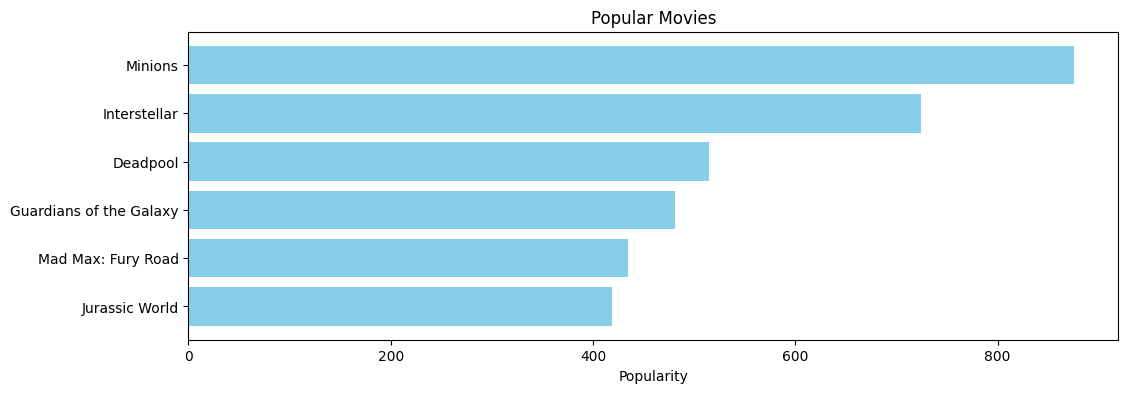

In [ ]:
pop= df2.sort_values('popularity', ascending=False)
import matplotlib.pyplot as plt
plt.figure(figsize=(12,4))

plt.barh(pop['title'].head(6),pop['popularity'].head(6), align='center',
        color='skyblue')
plt.gca().invert_yaxis()
plt.xlabel("Popularity")
plt.title("Popular Movies")

# **Content Based Filtering**

In [ ]:
df2['overview'].head(5)

0    In the 22nd century, a paraplegic Marine is di...
1    Captain Barbossa, long believed to be dead, ha...
2    A cryptic message from Bond’s past sends him o...
3    Following the death of District Attorney Harve...
4    John Carter is a war-weary, former military ca...
Name: overview, dtype: object

In [ ]:
# Имполтируем TfIdfVectorizer из scikit-learn
from sklearn.feature_extraction.text import TfidfVectorizer

# Определим объект векторизатора TF-IDF. Удалим все английские стоп-слова, такие как "the", "a"
tfidf = TfidfVectorizer(stop_words='english')

# Заменим значения NaN пустой строкой
df2['overview'] = df2['overview'].fillna('')

# Построим требуемую матрицу TF-IDF путем подгонки и преобразования данных
tfidf_matrix = tfidf.fit_transform(df2['overview'])

# Выведем размер tfidf_matrix
tfidf_matrix.shape

(4803, 20978)

In [ ]:
# Импортируем linear_kernel
from sklearn.metrics.pairwise import linear_kernel

# Вычислим матрицу косинусного подобия
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

In [ ]:
# Построим обратную карту индексов и названий фильмов
indices = pd.Series(df2.index, index=df2['title']).drop_duplicates()

In [ ]:
# Функция, которая принимает название фильма в качестве входных данных и выводит большинство похожих фильмов
def get_recommendations(title, cosine_sim=cosine_sim):
    # Получаем индекс фильма, который соответствует названию
    idx = indices[title]

    # Получаем оценки парного сходства всех фильмов с этим фильмом
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Отсортируем фильмы по показателям сходства
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Получаем оценки 10 самых похожих фильмов
    sim_scores = sim_scores[1:11]

    # Получаем индексы фильмов
    movie_indices = [i[0] for i in sim_scores]
    rec = df2['title'].iloc[movie_indices]

    # Возвращаем топ-10 самых похожих фильмов
    return rec

In [ ]:
get_recommendations('The Dark Knight Rises')

65                              The Dark Knight
299                              Batman Forever
428                              Batman Returns
1359                                     Batman
3854    Batman: The Dark Knight Returns, Part 2
119                               Batman Begins
2507                                  Slow Burn
9            Batman v Superman: Dawn of Justice
1181                                        JFK
210                              Batman & Robin
Name: title, dtype: object

In [ ]:
blankIndex=[''] * len(df2)
df2['title'].index=blankIndex
df2['title']

                                      Avatar
    Pirates of the Caribbean: At World's End
                                     Spectre
                       The Dark Knight Rises
                                 John Carter
                      ...                   
                                 El Mariachi
                                   Newlyweds
                   Signed, Sealed, Delivered
                            Shanghai Calling
                           My Date with Drew
Name: title, Length: 4803, dtype: object

In [ ]:
get_recommendations('The Avengers')

            Avengers: Age of Ultron
                            Plastic
                            Timecop
                 This Thing of Ours
              Thank You for Smoking
                      The Corruptor
    Wall Street: Money Never Sleeps
         Team America: World Police
                       The Fountain
                        Snowpiercer
Name: title, dtype: object

In [ ]:
# Разберем структурированные объекты на соответствующие им объекты python
from ast import literal_eval

features = ['cast', 'crew', 'keywords', 'genres']
for feature in features:
    df2[feature] = df2[feature].apply(literal_eval)

In [ ]:
# Узнаем имя режиссера в разделе "Съемочная группа". Если режиссера нет в списке, вернем NaN
def get_director(x):
    for i in x:
        if i['job'] == 'Director':
            return i['name']
    return np.nan

In [ ]:
# Возвращает 3 верхних элемента списка или весь список целиком; в зависимости от того, что больше
def get_list(x):
    if isinstance(x, list):
        names = [i['name'] for i in x]
        # Проверим, существует ли более 3 элементов. Если да, вернем только первые три. Если нет, вернем весь список
        if len(names) > 3:
            names = names[:3]
        return names

    # Возвращает пустой список в случае отсутствия/искажения данных
    return []

In [ ]:
# Определим нового режиссера, актерский состав, жанры и ключевые слова, которые будут представлены в подходящей форме
df2['director'] = df2['crew'].apply(get_director)

features = ['cast', 'keywords', 'genres']
for feature in features:
    df2[feature] = df2[feature].apply(get_list)

In [ ]:
# Распечатаем новые возможности первых 3-х фильмов
df2[['title', 'cast', 'director', 'keywords', 'genres']].head(3)

,title,cast,director,keywords,genres
0,Avatar,"[Sam Worthington, Zoe Saldana, Sigourney Weaver]",James Cameron,"[culture clash, future, space war]","[Action, Adventure, Fantasy]"
1,Pirates of the Caribbean: At World's End,"[Johnny Depp, Orlando Bloom, Keira Knightley]",Gore Verbinski,"[ocean, drug abuse, exotic island]","[Adventure, Fantasy, Action]"
2,Spectre,"[Daniel Craig, Christoph Waltz, Léa Seydoux]",Sam Mendes,"[spy, based on novel, secret agent]","[Action, Adventure, Crime]"


In [ ]:
# Функция для преобразования всех строк в нижний регистр и удаления пробелов из имен
def clean_data(x):
    if isinstance(x, list):
        return [str.lower(i.replace(" ", "")) for i in x]
    else:
        # Проверим, существует ли director. Если нет, вернем пустую строку
        if isinstance(x, str):
            return str.lower(x.replace(" ", ""))
        else:
            return ''

In [ ]:
# Применим функцию clean_data к нашим функциям
features = ['cast', 'keywords', 'director', 'genres']

for feature in features:
    df2[feature] = df2[feature].apply(clean_data)

In [ ]:
def create_soup(x):
    return ' '.join(x['keywords']) + ' ' + ' '.join(x['cast']) + ' ' + x['director'] + ' ' + ' '.join(x['genres'])
df2['soup'] = df2.apply(create_soup, axis=1)

In [ ]:
# Импортируем CountVectorizer и создадим матрицу подсчета
from sklearn.feature_extraction.text import CountVectorizer

count = CountVectorizer(stop_words='english')
count_matrix = count.fit_transform(df2['soup'])

In [ ]:
# Вычислим матрицу косинусоидального подобия на основе count_matrix
from sklearn.metrics.pairwise import cosine_similarity

cosine_sim2 = cosine_similarity(count_matrix, count_matrix)

In [ ]:
# Сбросим индекс нашего основного фрейма данных и построим обратное отображение, как и раньше
df2 = df2.reset_index()
indices = pd.Series(df2.index, index=df2['title'])

In [ ]:
get_recommendations('127 Hours', cosine_sim2)

3225                                      Limbo
2915                                      Trash
671                                     Everest
773                                     Flyboys
3043                           End of the Spear
310                     In the Heart of the Sea
961                                   The Beach
1754    The Sisterhood of the Traveling Pants 2
1452                                   The Walk
3492              The First Great Train Robbery
Name: title, dtype: object

In [ ]:
get_recommendations('Zombieland', cosine_sim2)

1567                  Warm Bodies
1430                       Cursed
3742                       Maggie
3139                Adventureland
116                   I Am Legend
370              Now You See Me 2
1070    Resident Evil: Extinction
4134      Lesbian Vampire Killers
4425                Zombie Hunter
799      Resident Evil: Afterlife
Name: title, dtype: object

In [ ]:
cosine_sim2[:10, :10]

array([[1.        , 0.3       , 0.2       , 0.1       , 0.2       ,
        0.3       , 0.        , 0.2       , 0.2       , 0.3       ],
       [0.3       , 1.        , 0.2       , 0.1       , 0.2       ,
        0.3       , 0.        , 0.2       , 0.2       , 0.3       ],
       [0.2       , 0.2       , 1.        , 0.2       , 0.3       ,
        0.2       , 0.        , 0.2       , 0.1       , 0.2       ],
       [0.1       , 0.1       , 0.2       , 1.        , 0.1       ,
        0.1       , 0.        , 0.1       , 0.        , 0.2       ],
       [0.2       , 0.2       , 0.3       , 0.1       , 1.        ,
        0.2       , 0.        , 0.3       , 0.1       , 0.2       ],
       [0.3       , 0.3       , 0.2       , 0.1       , 0.2       ,
        1.        , 0.        , 0.2       , 0.2       , 0.3       ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 1.        , 0.        , 0.21081851, 0.        ],
       [0.2       , 0.2       , 0.2      

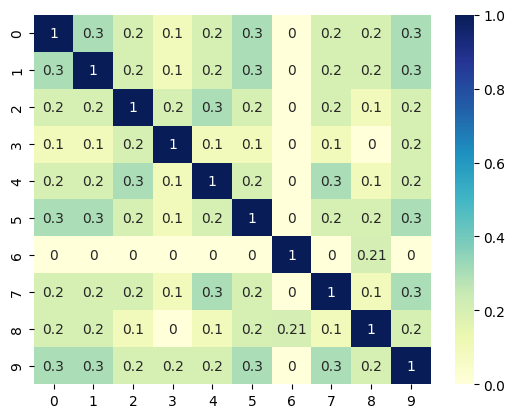

In [ ]:
# import modules
import matplotlib.pyplot as mp
import seaborn as sb

# plotting correlation heatmap
dataplot = sb.heatmap(cosine_sim2[:10, :10], cmap="YlGnBu", annot=True)

# displaying heatmap
mp.show()

In [ ]:
import numpy as np

# Данные о рейтингах фильмов от пользователей
ratings = np.array([
    [5, 4, 0, 0, 0],
    [0, 0, 3, 4, 0],
    [2, 0, 0, 0, 5],
    [0, 0, 0, 4, 4]
])

# Создаем матрицу взаимодействий (бинарную: 1 - взаимодействие, 0 - отсутствие взаимодействия)
interaction_matrix = (ratings > 0).astype(int)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Предположим, у нас есть данные о взаимодействии пользователей с элементами
X = features  # Матрица признаков
y = ratings  # Целевая переменная

# Разделяем данные на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Создаем модель (например, логистическую регрессию) и обучаем её
model = LogisticRegression()
model.fit(X_train, y_train)

# Делаем предсказания
y_pred = model.predict(X_test)

# **Collaborative Filtering**

In [ ]:
# Подключаем облако
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
from scipy import sparse
ratings = pd.read_csv('/content/drive/MyDrive/Датасеты/ml-latest-small/ratings.csv')
movies = pd.read_csv('/content/drive/MyDrive/Датасеты/ml-latest-small/movies.csv')
ratings = pd.merge(movies,ratings).drop(['genres','timestamp'],axis=1)
print(ratings.shape)
ratings.head()
ratings.head()

(100836, 4)


,movieId,title,userId,rating
0,1,Toy Story (1995),1,4.0
1,1,Toy Story (1995),5,4.0
2,1,Toy Story (1995),7,4.5
3,1,Toy Story (1995),15,2.5
4,1,Toy Story (1995),17,4.5


In [ ]:
# Не рассматривайте фильмы с количеством оценок пользователей менее 10 и заполните остальные nan значением 0
userRatings = ratings.pivot_table(index=['userId'],columns=['title'],values='rating')
userRatings.head()
print("Before: ",userRatings.shape)
userRatings = userRatings.dropna(thresh=10, axis=1).fillna(0,axis=1)
print("After: ",userRatings.shape)

Before:  (610, 9719)
After:  (610, 2269)


In [ ]:
# Алгоритм поиска сходства элементов, используемый для корреляции, с поправкой на средние значения
corrMatrix = userRatings.corr(method='pearson')
corrMatrix.head(100)

title,"'burbs, The (1989)",(500) Days of Summer (2009),10 Cloverfield Lane (2016),10 Things I Hate About You (1999),"10,000 BC (2008)",101 Dalmatians (1996),101 Dalmatians (One Hundred and One Dalmatians) (1961),12 Angry Men (1957),12 Years a Slave (2013),127 Hours (2010),...,Zack and Miri Make a Porno (2008),Zero Dark Thirty (2012),Zero Effect (1998),Zodiac (2007),Zombieland (2009),Zoolander (2001),Zootopia (2016),eXistenZ (1999),xXx (2002),¡Three Amigos! (1986)
title,,,,,,,,,,,,,,,,,,,,,
"'burbs, The (1989)",1.000000,0.063117,-0.023768,0.143482,0.011998,0.087931,0.224052,0.034223,0.009277,0.008331,...,0.017477,0.032470,0.134701,0.153158,0.101301,0.049897,0.003233,0.187953,0.062174,0.353194
(500) Days of Summer (2009),0.063117,1.000000,0.142471,0.273989,0.193960,0.148903,0.142141,0.159756,0.135486,0.200135,...,0.374515,0.178655,0.068407,0.414585,0.355723,0.252226,0.216007,0.053614,0.241092,0.125905
10 Cloverfield Lane (2016),-0.023768,0.142471,1.000000,-0.005799,0.112396,0.006139,-0.016835,0.031704,-0.024275,0.272943,...,0.242663,0.099059,-0.023477,0.272347,0.241751,0.195054,0.319371,0.177846,0.096638,0.002733
10 Things I Hate About You (1999),0.143482,0.273989,-0.005799,1.000000,0.244670,0.223481,0.211473,0.011784,0.091964,0.043383,...,0.243118,0.104858,0.132460,0.091853,0.158637,0.281934,0.050031,0.121029,0.130813,0.110612
"10,000 BC (2008)",0.011998,0.193960,0.112396,0.244670,1.000000,0.234459,0.119132,0.059187,-0.025882,0.089328,...,0.260261,0.087592,0.094913,0.184521,0.242299,0.240231,0.094773,0.088045,0.203002,0.083518
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Almost Famous (2000),0.099554,0.209549,0.032088,0.296727,0.134434,0.118628,0.242958,0.079158,0.005092,0.051279,...,0.244619,0.085395,0.072505,0.221259,0.126008,0.362571,0.011577,0.208008,0.186599,0.147413
Along Came Polly (2004),0.027287,0.282426,0.113213,0.193085,0.162678,0.180259,0.112928,0.121704,0.125792,0.124032,...,0.173133,0.160430,0.029076,0.189165,0.166278,0.309183,0.078468,-0.036498,0.231566,0.025928
Along Came a Spider (2001),0.064762,-0.003205,0.016372,0.085365,-0.018241,0.080388,0.094016,-0.016678,0.079375,-0.028052,...,0.115347,0.093774,0.085286,0.150757,0.052144,0.174489,0.014189,0.025327,0.233244,0.043581


In [ ]:
# Функция сходства для поиска похожих фильмов
def get_similar(movie_name,rating):
    similar_ratings = corrMatrix[movie_name]*(rating-2.5)
    # Получаем индексы фильмов
    similar_ratings = similar_ratings.sort_values(ascending=False)
    similar_ratings = pd.DataFrame(data=similar_ratings)
    return similar_ratings[1:11]

In [ ]:
corrMatrix2 = corrMatrix.head(5)

In [ ]:
corrMatrix2

title,"'burbs, The (1989)",(500) Days of Summer (2009),10 Cloverfield Lane (2016),10 Things I Hate About You (1999),"10,000 BC (2008)",101 Dalmatians (1996),101 Dalmatians (One Hundred and One Dalmatians) (1961),12 Angry Men (1957),12 Years a Slave (2013),127 Hours (2010),...,Zack and Miri Make a Porno (2008),Zero Dark Thirty (2012),Zero Effect (1998),Zodiac (2007),Zombieland (2009),Zoolander (2001),Zootopia (2016),eXistenZ (1999),xXx (2002),¡Three Amigos! (1986)
title,,,,,,,,,,,,,,,,,,,,,
"'burbs, The (1989)",1.000000,0.063117,-0.023768,0.143482,0.011998,0.087931,0.224052,0.034223,0.009277,0.008331,...,0.017477,0.032470,0.134701,0.153158,0.101301,0.049897,0.003233,0.187953,0.062174,0.353194
(500) Days of Summer (2009),0.063117,1.000000,0.142471,0.273989,0.193960,0.148903,0.142141,0.159756,0.135486,0.200135,...,0.374515,0.178655,0.068407,0.414585,0.355723,0.252226,0.216007,0.053614,0.241092,0.125905
10 Cloverfield Lane (2016),-0.023768,0.142471,1.000000,-0.005799,0.112396,0.006139,-0.016835,0.031704,-0.024275,0.272943,...,0.242663,0.099059,-0.023477,0.272347,0.241751,0.195054,0.319371,0.177846,0.096638,0.002733
10 Things I Hate About You (1999),0.143482,0.273989,-0.005799,1.000000,0.244670,0.223481,0.211473,0.011784,0.091964,0.043383,...,0.243118,0.104858,0.132460,0.091853,0.158637,0.281934,0.050031,0.121029,0.130813,0.110612
"10,000 BC (2008)",0.011998,0.193960,0.112396,0.244670,1.000000,0.234459,0.119132,0.059187,-0.025882,0.089328,...,0.260261,0.087592,0.094913,0.184521,0.242299,0.240231,0.094773,0.088045,0.203002,0.083518


In [ ]:
corrMatrix2 = corrMatrix2[["'burbs, The (1989)", '(500) Days of Summer (2009)', '10 Cloverfield Lane (2016)', '10 Things I Hate About You (1999)', '10,000 BC (2008)']]

In [ ]:
corrMatrix2

title,"'burbs, The (1989)",(500) Days of Summer (2009),10 Cloverfield Lane (2016),10 Things I Hate About You (1999),"10,000 BC (2008)"
title,,,,,
"'burbs, The (1989)",1.000000,0.063117,-0.023768,0.143482,0.011998
(500) Days of Summer (2009),0.063117,1.000000,0.142471,0.273989,0.193960
10 Cloverfield Lane (2016),-0.023768,0.142471,1.000000,-0.005799,0.112396
10 Things I Hate About You (1999),0.143482,0.273989,-0.005799,1.000000,0.244670
"10,000 BC (2008)",0.011998,0.193960,0.112396,0.244670,1.000000


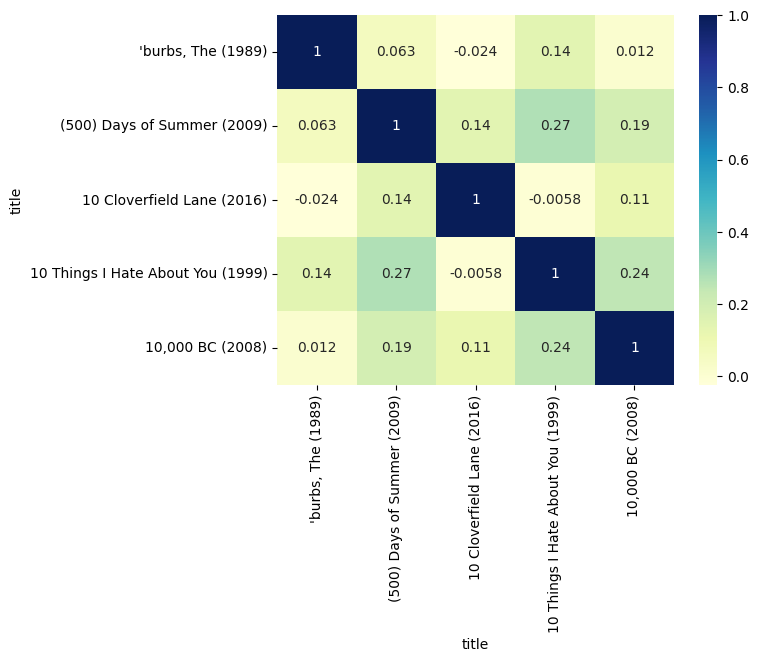

In [ ]:
# plotting correlation heatmap
dataplot = sb.heatmap(corrMatrix2, cmap="YlGnBu", annot=True)

# displaying heatmap
mp.show()

In [ ]:
similar_movies = get_similar("127 Hours (2010)",2)

In [ ]:
romantic_lover = [("127 Hours (2010)",2),("Hangover, The (2009)",4)]
similar_movies = pd.DataFrame()
for movie,rating in romantic_lover:
    similar_movies = pd.concat([similar_movies, get_similar(movie,rating)], axis=1)

In [ ]:
romantic_lover

[('127 Hours (2010)', 2), ('Hangover, The (2009)', 4)]